SelectMultiple(description='Categories', index=(25,), options=(('carrot', 1), ('cucumber', 2), ('green_bell_pe…

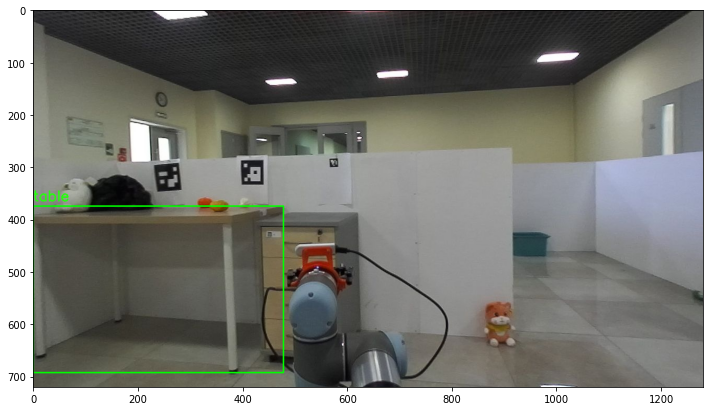

In [10]:
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from pycocotools.coco import COCO

# Путь к файлу аннотаций
annotation_file_path = '../dataset/result.json'

# Загрузка COCO аннотаций
coco_annotations = COCO(annotation_file_path)

# Путь к папке с изображениями
image_directory_path = '../dataset/imgs'

# Получение всех уникальных category_id в наборе данных
unique_category_ids = [category['id'] for category in coco_annotations.loadCats(coco_annotations.getCatIds())]

# Создание виджета для выбора категорий
category_selector_widget = widgets.SelectMultiple(
    options=[(category['name'], category['id']) for category in coco_annotations.loadCats(unique_category_ids)],
    value=unique_category_ids,
    description='Categories',
    disabled=False
)
display(category_selector_widget)

def visualize_bounding_boxes(image_id):
    # Загрузка изображения
    image_data = coco_annotations.loadImgs(image_id)[0]
    image_path = os.path.join(image_directory_path, image_data['file_name'])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Получение аннотаций для данного изображения
    annotation_ids = coco_annotations.getAnnIds(imgIds=image_id, catIds=category_selector_widget.value, iscrowd=None)
    annotations = coco_annotations.loadAnns(annotation_ids)

    # Наложение bbox-ов на изображение
    for annotation in annotations:
        x, y, width, height = annotation['bbox']
        image = cv2.rectangle(image, (int(x), int(y)), (int(x+width), int(y+height)), (0, 255, 0), 2)
        cv2.putText(image, coco_annotations.loadCats(annotation['category_id'])[0]['name'], (int(x), int(y-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    # Визуализация результата
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.show()

def on_category_change(change):
    clear_output()
    display(category_selector_widget)
    visualize_bounding_boxes(image_id)

category_selector_widget.observe(on_category_change, 'value')

# Замените image_id на ID изображения, которое вы хотите визуализировать
image_id = 1
visualize_bounding_boxes(image_id)


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
IoU for the bbox = 0.0


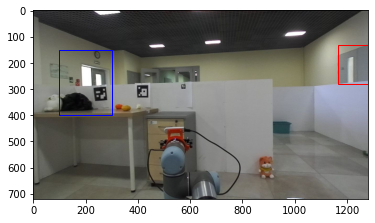

IoU for the bbox = 0.14871156779320863


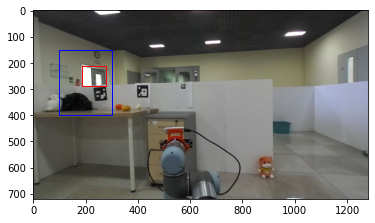

IoU for the bbox = 0.0


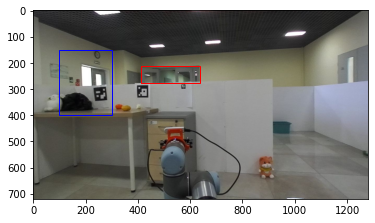

IoU for the bbox = 0.0


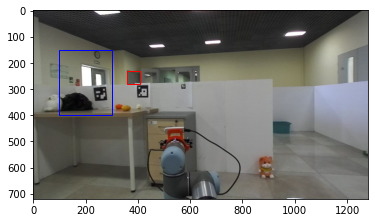

In [16]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

# Функция для расчета IoU
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    x_start = max(x1, x2)
    y_start = max(y1, y2)
    x_end = min(x1+w1, x2+w2)
    y_end = min(y1+h1, y2+h2)
    inter_area = max(0, x_end - x_start + 1) * max(0, y_end - y_start + 1)
    box1_area = w1 * h1
    box2_area = w2 * h2
    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

# Путь к файлу аннотаций
annotation_file_path = '../dataset/result.json'

# Загрузка COCO аннотаций
coco_annotations = COCO(annotation_file_path)

# Предположим, что у нас есть следующие данные:
image_id = 1  # Замените на соответствующий ID изображения
category_id = 24  # Замените на соответствующий ID категории
predicted_bbox = [100.0, 150.0, 200.0, 250.0]  # Замените на соответствующий предсказанный bbox

# Получим все аннотации для данного изображения и категории
annotation_ids = coco_annotations.getAnnIds(imgIds=image_id, catIds=category_id, iscrowd=None)
annotations = coco_annotations.loadAnns(annotation_ids)

# Получим информацию об изображении
image_info = coco_annotations.loadImgs(image_id)[0]
image_path = os.path.join('../dataset/imgs', image_info['file_name'])  # Путь к папке с изображениями

def plot_bbox(image_path, true_bbox, predicted_bbox):
    # Открываем изображение
    im = np.array(Image.open(image_path), dtype=np.uint8)

    # Создаем фигуру и оси
    fig, ax = plt.subplots(1)

    # Отображаем изображение
    ax.imshow(im)

    # Создаем прямоугольник для истинного bbox
    true_rect = patches.Rectangle((true_bbox[0], true_bbox[1]), true_bbox[2], true_bbox[3], 
                                  linewidth=1, edgecolor='r', facecolor='none')

    # Создаем прямоугольник для предсказанного bbox
    predicted_rect = patches.Rectangle((predicted_bbox[0], predicted_bbox[1]), predicted_bbox[2], predicted_bbox[3], 
                                       linewidth=1, edgecolor='b', facecolor='none')

    # Добавляем прямоугольники на изображение
    ax.add_patch(true_rect)
    ax.add_patch(predicted_rect)

    plt.show()

# Применяем функцию
for annotation in annotations:
    true_bbox = annotation['bbox']
    iou = calculate_iou(true_bbox, predicted_bbox)
    print(f'IoU for the bbox = {iou}')
    plot_bbox(image_path, true_bbox, predicted_bbox)
